<a href="https://colab.research.google.com/github/vigu4518/cifar10-from-scratch-to-transfer-learning/blob/main/CIFAR_10_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score


# Loading the Data

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

### **As the y_train array is an 2d array we will flatten it into 1D so that we can classify**

In [3]:
import numpy as np
y_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [6]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [18]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

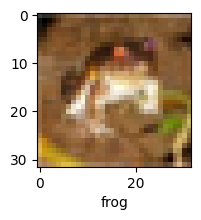

In [22]:
plot_sample(X=X_train, y=y_train.flatten(), index=0)

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# **Artificial Neural Network **

In [37]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3040 - loss: 1.9331
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4219 - loss: 1.6388
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4530 - loss: 1.5510
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4765 - loss: 1.4877
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4986 - loss: 1.4250


As you can see the accuracy is pretty low as ANN is not suited for image clasification as for images ANN uses lot of parameters and does not take edges etc into consideration so use CNN which can handle 2D,3D arrays and has pooling to reduce dimensions

# Convolutional Neurak Network

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3626 - loss: 1.7416
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5756 - loss: 1.1975
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6385 - loss: 1.0375
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6695 - loss: 0.9482
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6959 - loss: 0.8663
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7169 - loss: 0.8151
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7371 - loss: 0.7601
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7570 - loss: 0.7091
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7648 - loss: 0.6756
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7771 - loss: 0.6444


In [20]:
cnn.evaluate(X_test,y_test)
pred1=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7012 - loss: 0.9098
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


As you can see the accuracy was way better compared to ANN now lets try to improve the accuracy by using various methods

# **1) Increasing convolution layers**

In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),


    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3381 - loss: 1.7686
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5842 - loss: 1.1708
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6550 - loss: 0.9883
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7016 - loss: 0.8548
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7308 - loss: 0.7730
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7575 - loss: 0.6948
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7779 - loss: 0.6405
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7929 - loss: 0.5890
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8102 - loss: 0.5436
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8240 - loss: 0.5010


In [23]:
cnn.evaluate(X_test,y_test)
pre2=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7154 - loss: 0.8855
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# As you can see, increasing the layer helped the accuracy but it will stop at some point

# 2) removing some networks to prevent overfitting

In [44]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),


    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax'),



])


In [45]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3140 - loss: 1.8516
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5534 - loss: 1.2686
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6332 - loss: 1.0736
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6727 - loss: 0.9638
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7104 - loss: 0.8650
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7312 - loss: 0.8041
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7585 - loss: 0.7150
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7798 - loss: 0.6511
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7951 - loss: 0.6029
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8189 - loss: 0.5408


In [46]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6995 - loss: 0.9635


[0.9604928493499756, 0.701200008392334]

# Now you can see dropping layers has not improved accuracy this is beacuse the network is not densed hence had not caused any overfitting

# 3) Doing Augmentation

In [52]:


datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),



    layers.Flatten(),
    layers.Dense(128, activation='relu'),


    layers.Dense(10, activation='softmax'),



])


In [49]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6633 - loss: 0.9421


[0.9627941250801086, 0.6610000133514404]

## 4)Augmentation plus dropping

In [54]:


datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),



    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),


    layers.Dense(10, activation='softmax'),



])


In [55]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=30,
    validation_data=(X_test, y_test),
    steps_per_epoch=X_train.shape[0] // 64
)

Epoch 1/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.2675 - loss: 1.9543 - val_accuracy: 0.5031 - val_loss: 1.3770
Epoch 2/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4531 - loss: 1.4583 - val_accuracy: 0.4847 - val_loss: 1.4186
Epoch 3/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.4631 - loss: 1.4716 - val_accuracy: 0.5481 - val_loss: 1.2455
Epoch 4/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - accuracy: 0.5781 - loss: 1.3226 - val_accuracy: 0.5458 - val_loss: 1.2514
Epoch 5/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.5235 - loss: 1.3355 - val_accuracy: 0.6145 - val_loss: 1.0853
Epoch 6/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - accuracy: 0.6562 - loss: 1.1124 - val_accuracy: 0.6111 - val_loss: 1.1040
Epoch 7/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.5627 - loss: 1.2331 - val_accuracy: 0.6311 - val_loss: 1.0419
Epoch 8/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6250 - loss: 1.1884 - val_

# 5) Applying learning rate schedule and early

In [10]:


# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# CNN Model
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax'),
])

# Compile
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  # Watch validation loss
    factor=0.5,           # Reduce LR by 50%
    patience=3,           # Wait 3 epochs before reducing
    verbose=1             # Print updates
)

# Early stopping (optional)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train model
cnn.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=30,
    validation_data=(X_test, y_test),
    steps_per_epoch=X_train.shape[0] // 64,
    callbacks=[lr_scheduler, early_stop]
)


Epoch 1/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.3934 - loss: 1.7468 - val_accuracy: 0.6127 - val_loss: 1.0997 - learning_rate: 0.0010
Epoch 2/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6406 - loss: 1.0340

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6406 - loss: 1.0340 - val_accuracy: 0.6146 - val_loss: 1.0964 - learning_rate: 0.0010
Epoch 3/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.5785 - loss: 1.1896 - val_accuracy: 0.5192 - val_loss: 1.4868 - learning_rate: 0.0010
Epoch 4/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6094 - loss: 1.0408 - val_accuracy: 0.5597 - val_loss: 1.3580 - learning_rate: 0.0010
Epoch 5/30
780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6326 - loss: 1.0522
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
781/781 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.6326 - loss: 1.0521 - val_accuracy: 0.5867 - val_loss: 1.1913 - learning_rate: 0.0010
Epoch 6/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - accuracy: 0.6875 - loss: 0.8458 - val_accuracy: 0.5909 - val_loss: 1.1722 - learning_rate: 5.0000e-04
Epoch 7/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6773 - loss: 0.9251 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


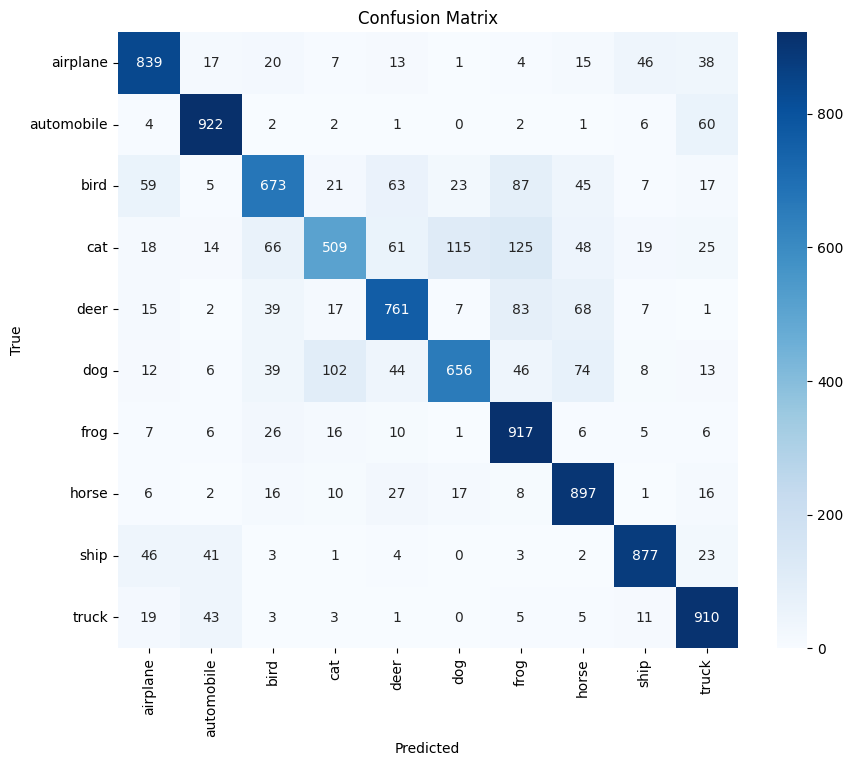

In [15]:

# Prediction
y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=classes,
            yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# 6) Using transfer learning (Resnet20)

In [9]:


# CIFAR-10 specific ResNet block
def resnet_block(inputs, filters, strides=1, downsample=False):
    x = layers.Conv2D(filters, kernel_size=3, strides=strides, padding='same',
                      kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, kernel_size=3, strides=1, padding='same',
                      kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)

    if downsample:
        inputs = layers.Conv2D(filters, kernel_size=1, strides=strides,
                               padding='same', kernel_initializer='he_normal')(inputs)
        inputs = layers.BatchNormalization()(inputs)

    x = layers.Add()([x, inputs])
    x = layers.Activation('relu')(x)
    return x

def build_resnet20(input_shape=(32, 32, 3), num_classes=10):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(16, 3, padding='same', kernel_initializer='he_normal')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # 3x (3 residual blocks)
    for i in range(3):
        x = resnet_block(x, 16)

    # 3x (3 residual blocks), with downsampling at start
    x = resnet_block(x, 32, strides=2, downsample=True)
    for i in range(2):
        x = resnet_block(x, 32)

    # 3x (3 residual blocks), with downsampling at start
    x = resnet_block(x, 64, strides=2, downsample=True)
    for i in range(2):
        x = resnet_block(x, 64)

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs=inputs, outputs=outputs)

# Build model
resnet20 = build_resnet20()

# Compile
resnet20.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)

# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train model
resnet20.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=30,
    validation_data=(X_test, y_test),
    steps_per_epoch=X_train.shape[0] // 64,
    callbacks=[lr_scheduler, early_stop]
)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 70s 60ms/step - accuracy: 0.3974 - loss: 1.6460 - val_accuracy: 0.4579 - val_loss: 1.5633 - learning_rate: 0.0010
Epoch 2/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.5156 - loss: 1.4003

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5156 - loss: 1.4003 - val_accuracy: 0.4600 - val_loss: 1.5565 - learning_rate: 0.0010
Epoch 3/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.5867 - loss: 1.1508 - val_accuracy: 0.6148 - val_loss: 1.0782 - learning_rate: 0.0010
Epoch 4/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6250 - loss: 1.1199 - val_accuracy: 0.6205 - val_loss: 1.0575 - learning_rate: 0.0010
Epoch 5/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.6566 - loss: 0.9770 - val_accuracy: 0.6129 - val_loss: 1.0950 - learning_rate: 0.0010
Epoch 6/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7656 - loss: 0.6702 - val_accuracy: 0.6044 - val_loss: 1.1119 - learning_rate: 0.0010
Epoch 7/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6989 - loss: 0.8545
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
781/781 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6989 - loss: 0.8545 - val_a

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


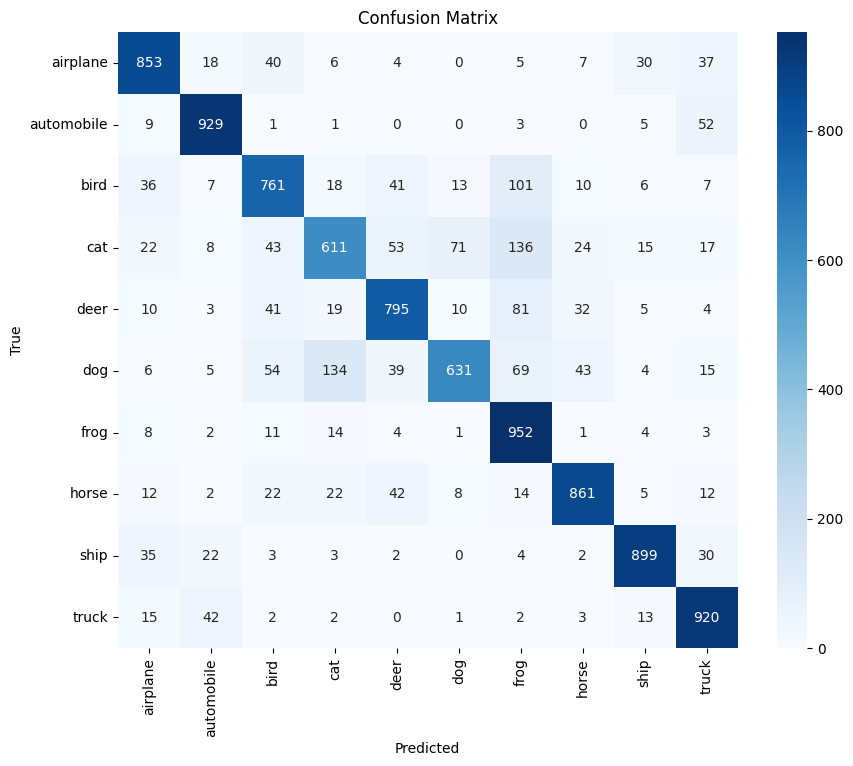

In [10]:

# Prediction
y_pred_probs = resnet20.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=classes,
            yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [17]:
import pandas as pd

# Generate report as a dictionary
report_dict = classification_report(y_test, y_pred, target_names=classes, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Round to 2 decimal places
report_df = report_df.round(2)

# Display
print("\nClassification Report:")
display(report_df)



Classification Report:


,precision,recall,f1-score,support
airplane,0.85,0.85,0.85,1000.00
automobile,0.89,0.93,0.91,1000.00
bird,0.78,0.76,0.77,1000.00
cat,0.74,0.61,0.67,1000.00
deer,0.81,0.80,0.80,1000.00
dog,0.86,0.63,0.73,1000.00
frog,0.70,0.95,0.80,1000.00
horse,0.88,0.86,0.87,1000.00
ship,0.91,0.90,0.91,1000.00
truck,0.84,0.92,0.88,1000.00


# 7) Doing ensemble by combining predictions of 3 models

In [29]:


ensemble_pred_probs = (pred1 + pre2 + y_pred_probs) / 3
ensemble_pred = np.argmax(ensemble_pred_probs, axis=1)
y_true = y_test.flatten()

In [31]:
print("\nEnsemble Accuracy:", accuracy_score(y_true, ensemble_pred))
print("\nClassification Report:")
print(classification_report(y_true, ensemble_pred,target_names=classes))


Ensemble Accuracy: 0.8073

Classification Report:
              precision    recall  f1-score   support

    airplane       0.83      0.84      0.84      1000
  automobile       0.91      0.92      0.91      1000
        bird       0.67      0.78      0.72      1000
         cat       0.68      0.64      0.66      1000
        deer       0.81      0.78      0.80      1000
         dog       0.87      0.58      0.70      1000
        frog       0.75      0.91      0.82      1000
       horse       0.88      0.82      0.85      1000
        ship       0.88      0.90      0.89      1000
       truck       0.84      0.89      0.87      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

